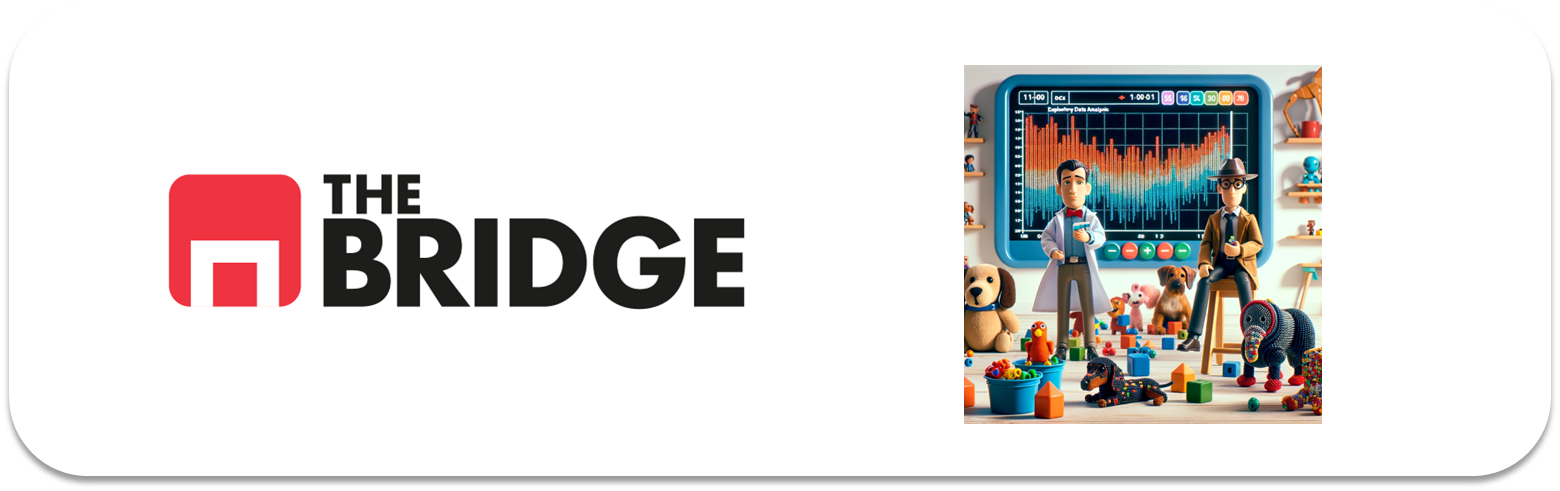

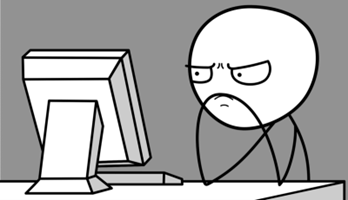

Para ejercitarte y afianzar lo aprendido sobre análisis multivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion



### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [2]:
df_admision = pd.read_csv("./data/admission_data.csv")

df_admision.head()

,Unnamed: 0,Year,Major,Gender,Admission
0,0,1973,School of Medicine,F,Rejected
1,1,1973,Department of Economics,M,Accepted
2,2,1973,Other,F,Accepted
3,3,1973,Other,M,Accepted
4,4,1973,Other,M,Rejected


In [4]:
df_admision.drop(columns = ["Unnamed: 0", "Year"], inplace = True)

### Ejercicio 2

Realiza los análisis multivariante que consideres necesarios para contestar apoyándote en los datos a las preguntas: ¿Existe algún departamenteo específico donde pudieramos hablar de discriminación?¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género? 

Para poder analizar la pregunta formulada, haremos un análisis multivariante sobre las variables categóricas `Major`, `Admission`y `Gender`.

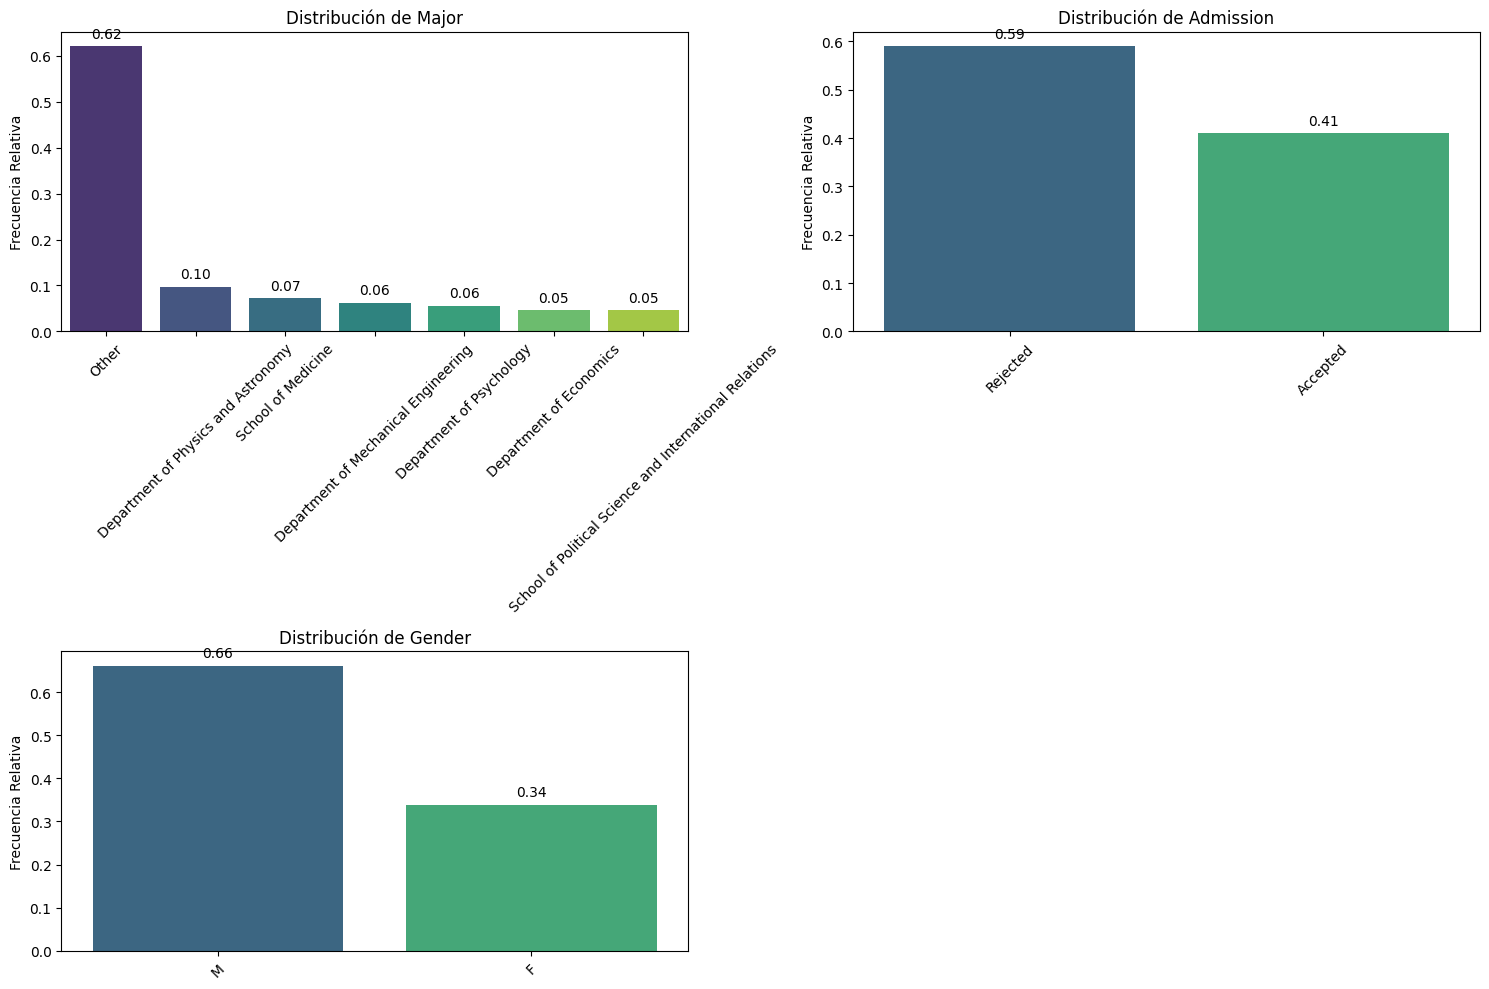

In [5]:
# Muestro los valores relativos de cada variable
pinta_distribucion_categoricas(df_admision,["Major","Admission","Gender"], relativa= True, mostrar_valores= True)

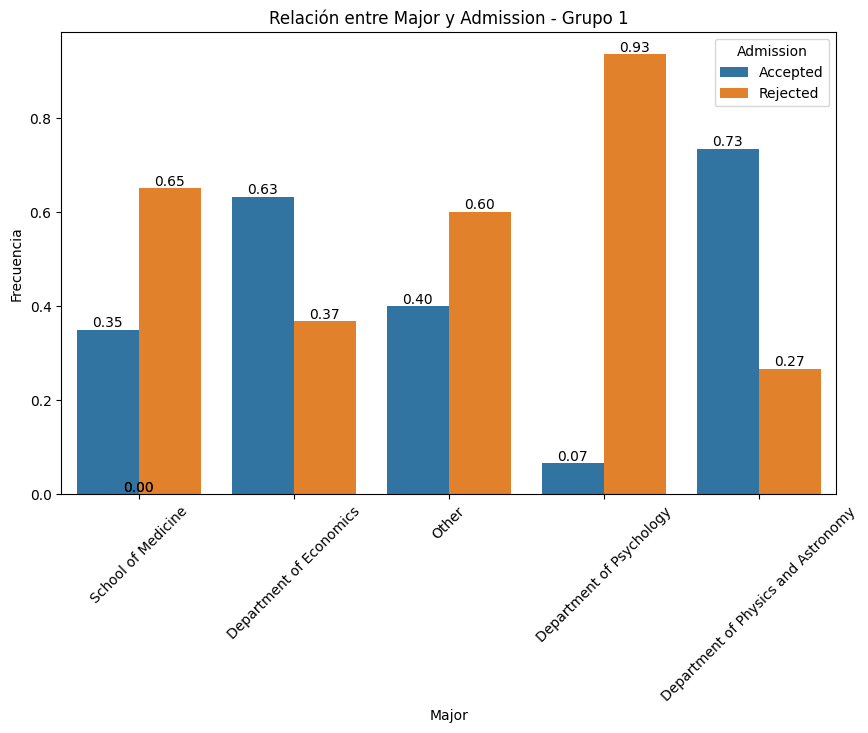

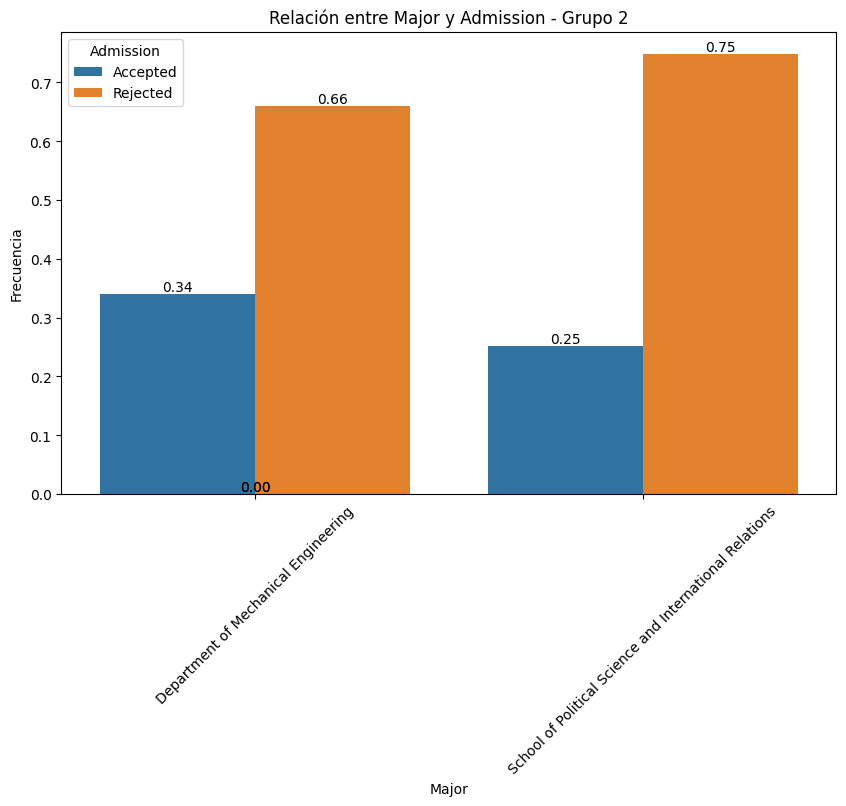

In [6]:
# Escojo la variable directora que en este caso es 'Admission'
# Muestro el bivariante de cada una con las otras dos

plot_categorical_relationship_fin(df_admision,"Major","Admission", relative_freq= True, show_values= True)

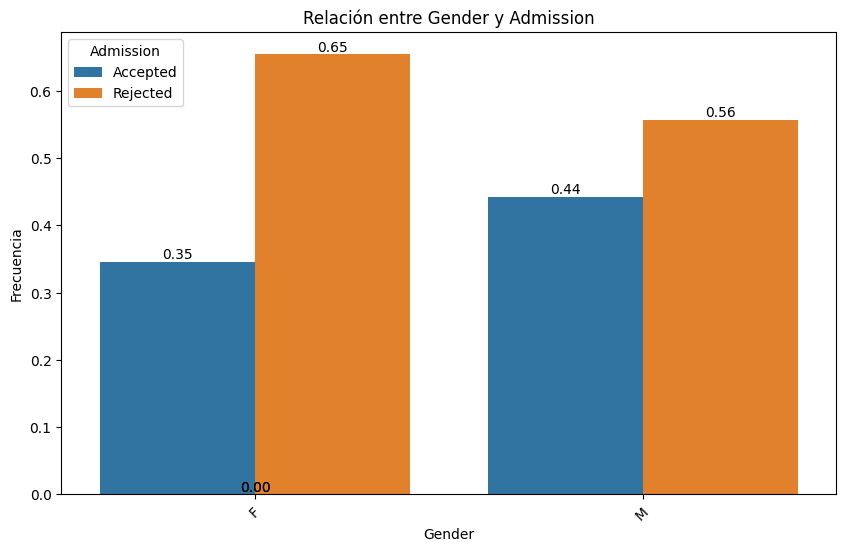

In [7]:
plot_categorical_relationship_fin(df_admision,"Gender","Admission", relative_freq= True, show_values= True)

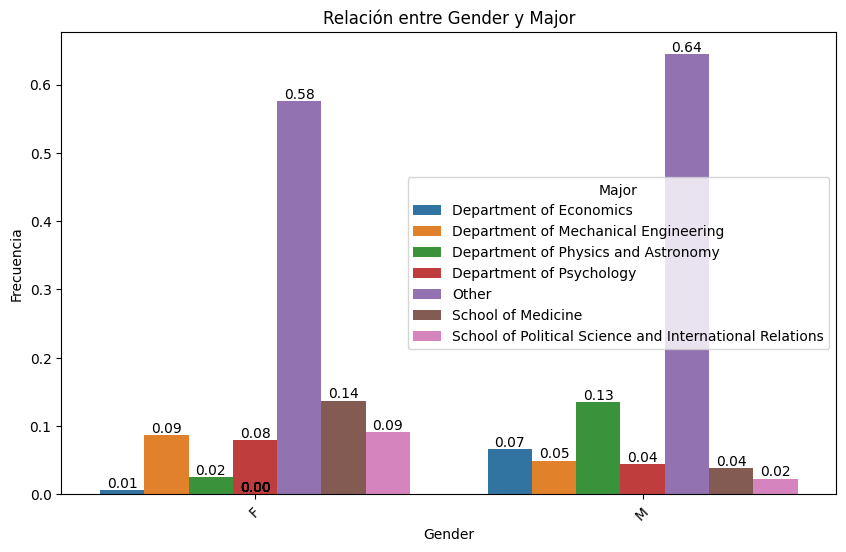

In [8]:
plot_categorical_relationship_fin(df_admision,"Gender","Major", relative_freq= True, show_values= True)

Podemos ver que en los deparados donde hay un alto porcentaje de rechazados: psicología y ciencias de la poíticas, hay más mujeres que hombres.
Y los departamentos donde hay más porcentaje de admitidos: economía y astronomía, hay más hombres que mujeres.

In [9]:
# Ahora divido mi datase en tantps subdatasets como valores de 'Admission' haya.
columnas = ["Admission", "Major", "Gender"]
col_directora = "Admission"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_admision[col_directora].unique():
    diccionario_multivariante[valor] = df_admision.loc[df_admision[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta Rejected:


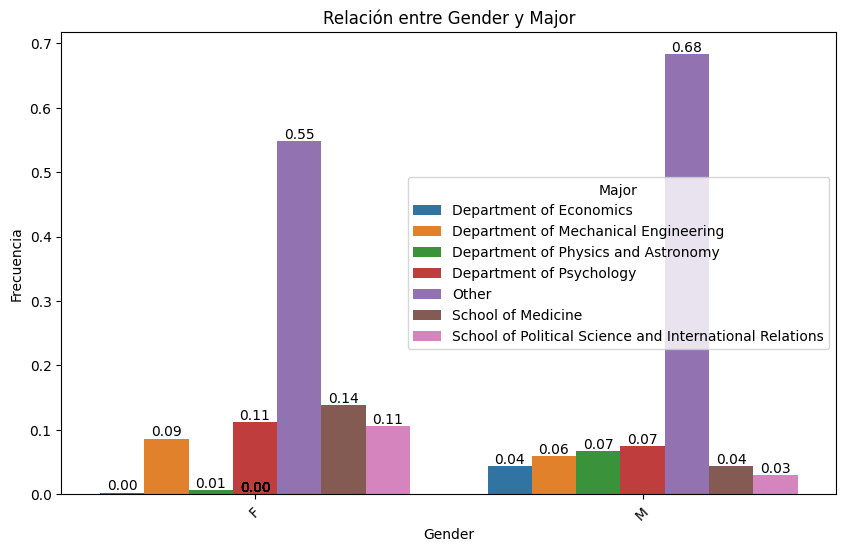

Respuesta Accepted:


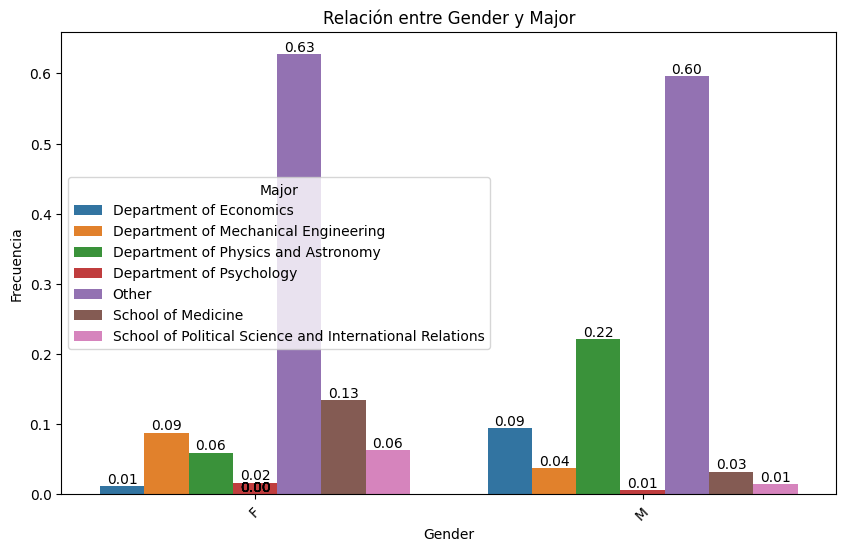

In [10]:
# Hago un análisis bivariante para cada subdataser y comparo todo
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

***Análisis***:
- De las bivariantes podemos obsrvar que en los departamentos donde hay un alto porcentaje de rechazados, psicología y ciencias de la poíticas, hay más mujeres que hombres.
Y los departamentos donde hay más porcentaje de admitidos, economía y astronomía, hay más hombres que mujeres.

- En análisis a 3 bandas, muestra solo una cosa más significativa, y es que en el departamento de Física y Astronomía hay un porcentaje más alto de hombre que de mujeres. Podemos decir que puede existir una ligera discriminación ya que aceptan más hombres que mujeres. Sin embargo, puede deberse a que las mujeres no optan por solcitar este departamento ya que si obervamos el índice de rechazo en este departamento para las muujeres, no es muy alto con respecto a las admisiones.

### Ejercicio 3

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [11]:
df_tips = pd.read_csv("./data/tips.csv")

df_tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
df_tips.drop(columns = "Unnamed: 0", inplace = True)

### Ejercicio 4

Carga el dataset de accidentes que conoces de la unidad anterior y que se encuentra en la ruta "./data/car_crashes.csv", deshazte de las columnas innecesarias y renombra la que contiene las iniciales de los estados a "state"

In [14]:
df_crashes = pd.read_csv("./data/car_crashes.csv", sep = "|")
df_crashes.head(10)

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


In [15]:
df_crashes.drop(columns = "Unnamed: 0", inplace = True)

In [17]:
df_crashes.rename(columns = {"abbrev": "state"}, inplace = True)

### Ejercicio 5

Realiza una análisis de todas las posibles correlaciones dos a dos, de forma numérica primero y luego empleado un heatmap y un pairplot de seaborn. ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total?

In [18]:
corr_matrix = df_crashes.corr(numeric_only= True)
corr_matrix

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


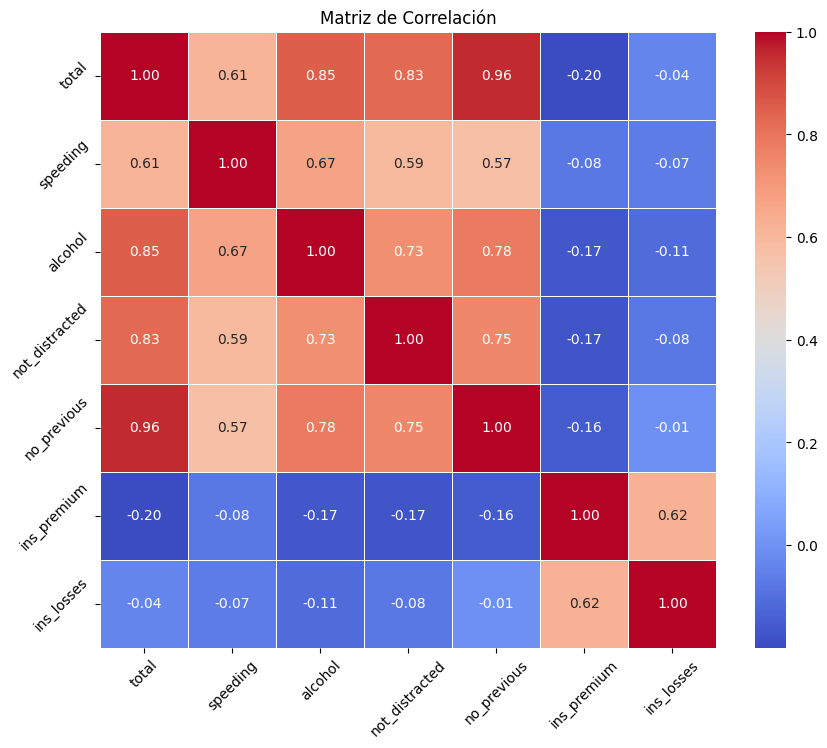

In [19]:
plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()

In [20]:
df_solo_numeros = df_crashes.select_dtypes(include = ["float","int"])
df_solo_numeros.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses'],
      dtype='object')

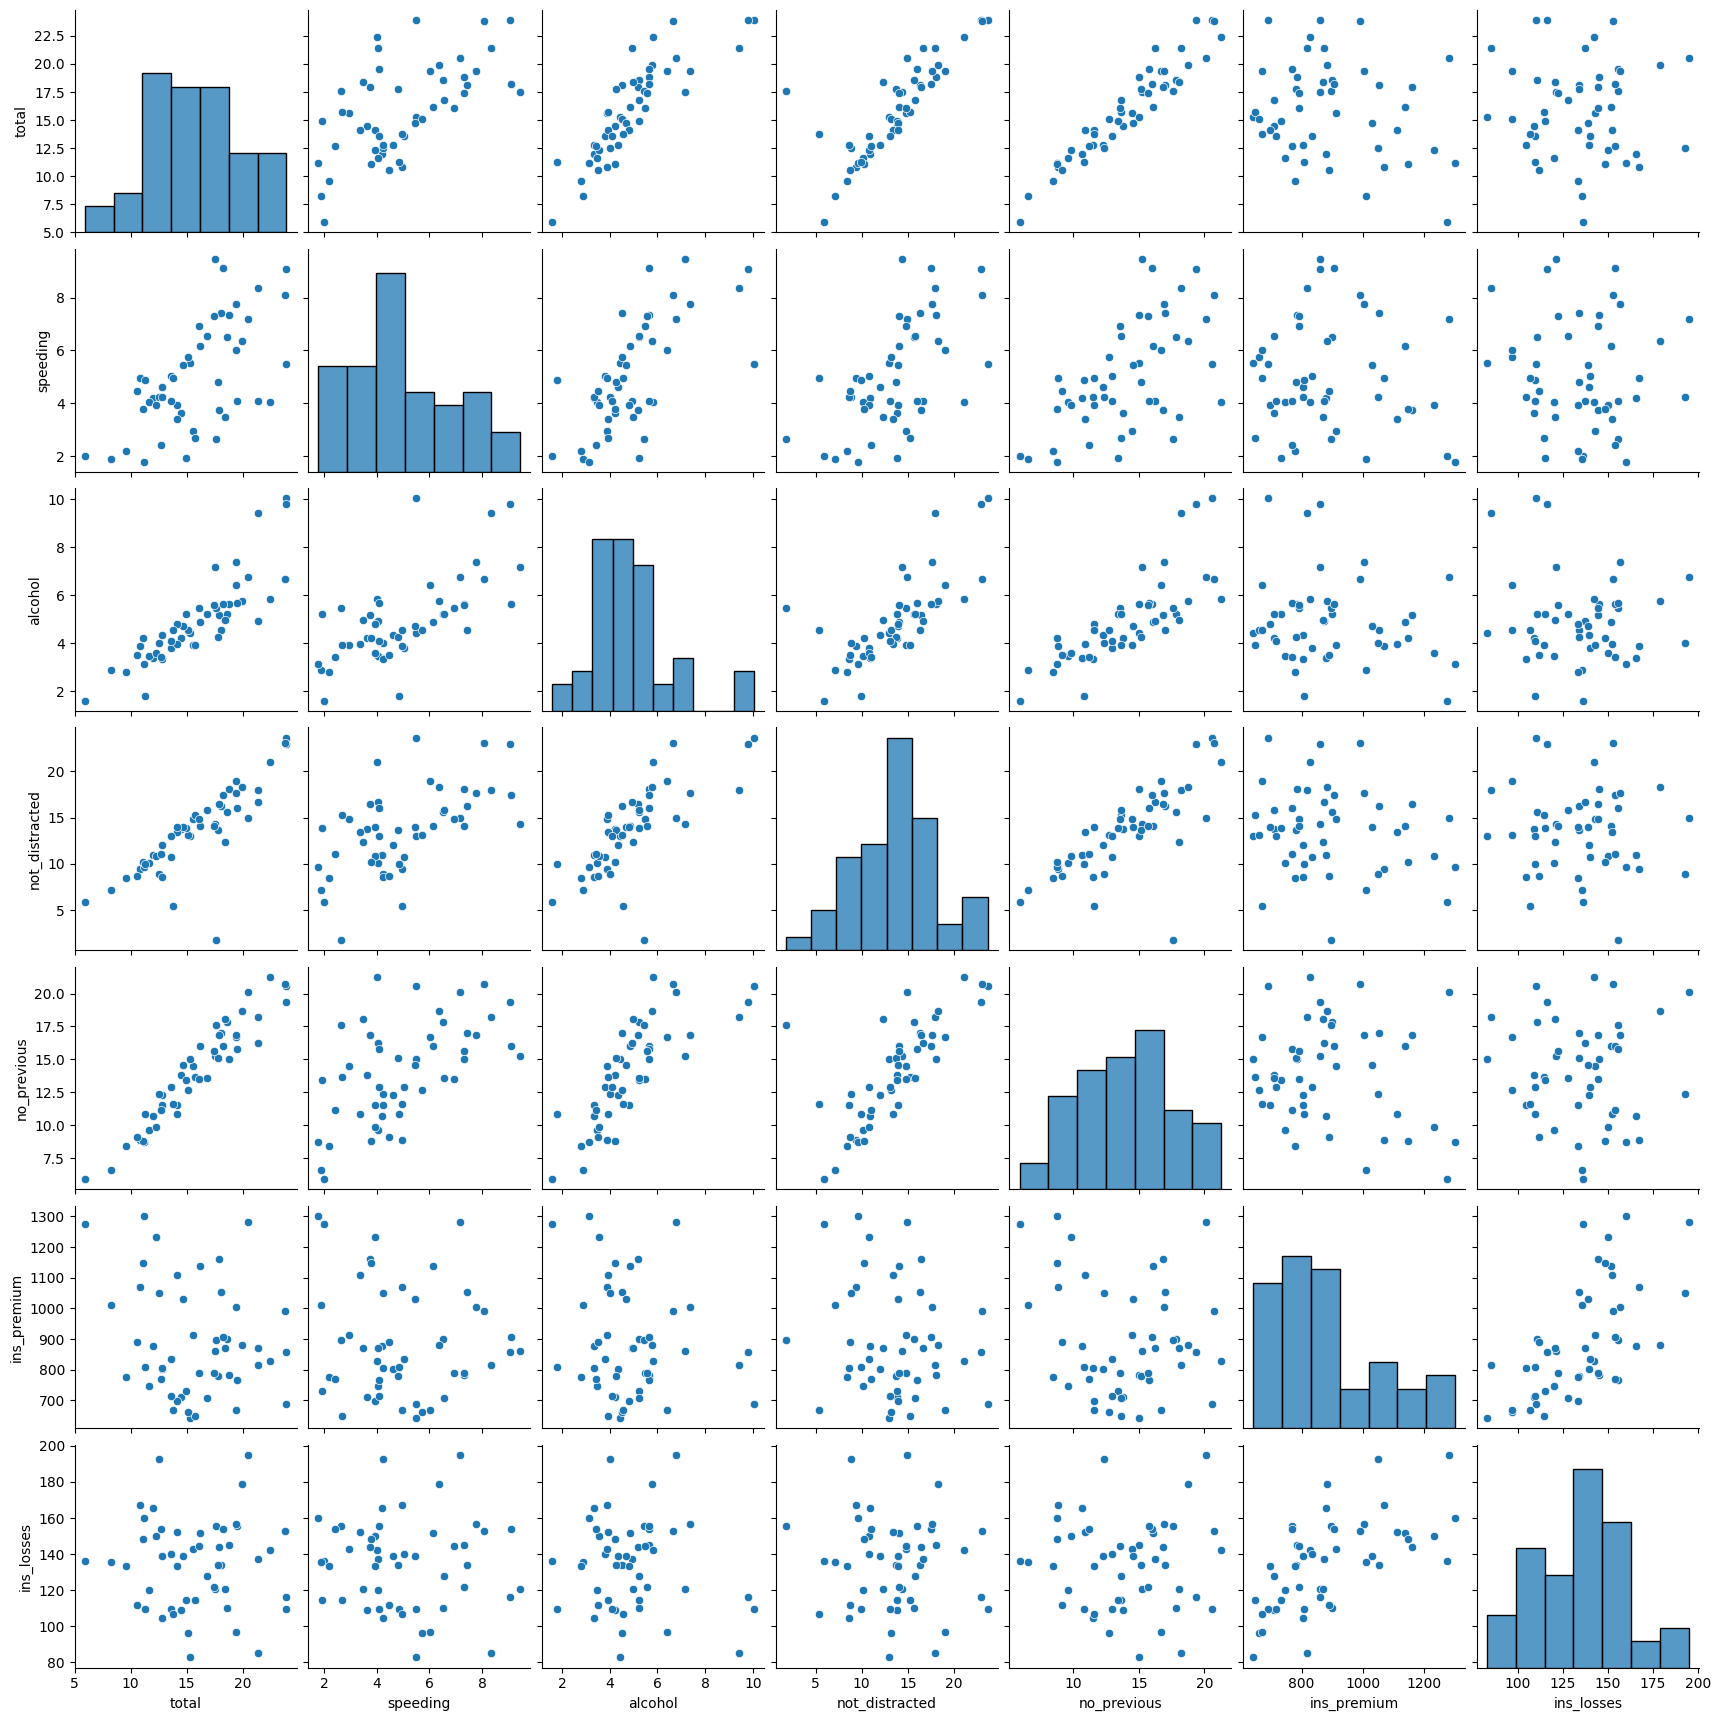

In [21]:
sns.pairplot(df_solo_numeros)
plt.show()

### Ejercicio 6

Realiza un análisis multivariante entre las variables numéricas "total", "alcohol", "speeding". ¿Puedes sacar alguna conclusión interesante?